In [1]:
import covasim as cv
import matplotlib.pyplot as plt
import numpy as np

Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [2]:
start_day = '2020-03-02'
end_day   = '2020-06-01'
all_days = cv.date_range(start_day, end_day)


In [3]:
# defining a moving beta accoding to the article predicting regional covid 19 hospital admissions in Sweden using mobility data

mobility='''0
-0,0436877025562212
-0,142183890633573
-0,414264196497882
-0,490226517606742
-0,520691444229291
-0,601104998394856
-0,565468289968282
-0,500887028474234
-0,533539503417897
-0,489363271950639
-0,479732407975015
-0,525650201055078
-0,4254
-0,4325
-0,394
-0,53
-0,47
-0,5
-0,53
-0,56
-0,55
-0,53
-0,5
-0,47
-0,39
-0,35
-0,34
-0,34
-0,33
-0,33
-0,32
-0,31
-0,32
-0,31
-0,42
-0,41
-0,43
-0,45
-0,44
-0,44
-0,51
-0,51
-0,66
-0,77
'''.replace(',','.').split('\n')


floatmobility = [float(i) for i in mobility if i != '']
betas = [ 4.11 + 6.68 * mob for mob in floatmobility]
betas_by_week=np.array([betas[i//7] for i in range(len(all_days))])

In [7]:
parameters_sweden=dict(pop_size=1608037,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            beta=0.015 # value to change
                            )




In [8]:


# interventions of changing beta
cb = cv.change_beta(days=all_days, changes=betas_by_week, do_plot=False)


In [9]:
my_simulation_sweden_interventions=cv.Sim(parameters_sweden, interventions=cb, label=r'Varying $\beta$ with mobility' )
my_simulation_sweden_interventions.run()
my_simulation_sweden_interventions.plot()


Initializing sim with 1608037 people for 91 days
Loading location-specific data for "Sweden"
  Running "Varying $\beta$ with mobility": 2020-03-02 ( 0/91) (29.71 s)  ———————————————————— 1%
  Running "Varying $\beta$ with mobility": 2020-03-12 (10/91) (39.07 s)  ••—————————————————— 12%
  Running "Varying $\beta$ with mobility": 2020-03-22 (20/91) (50.13 s)  ••••———————————————— 23%
  Running "Varying $\beta$ with mobility": 2020-04-01 (30/91) (61.43 s)  ••••••—————————————— 34%
  Running "Varying $\beta$ with mobility": 2020-04-11 (40/91) (70.46 s)  ••••••••———————————— 45%


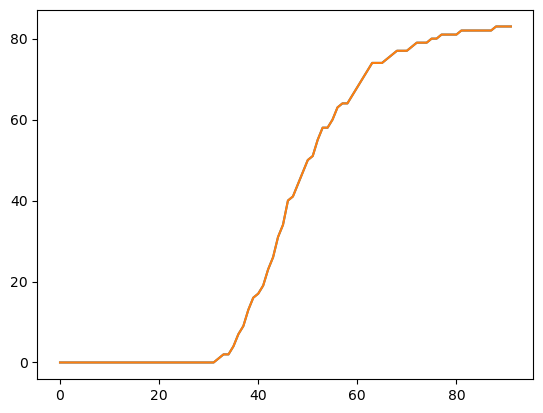

In [38]:
plt.plot(np.array(my_simulation_sweden_interventions.results['cum_deaths']))
plt.show()